In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

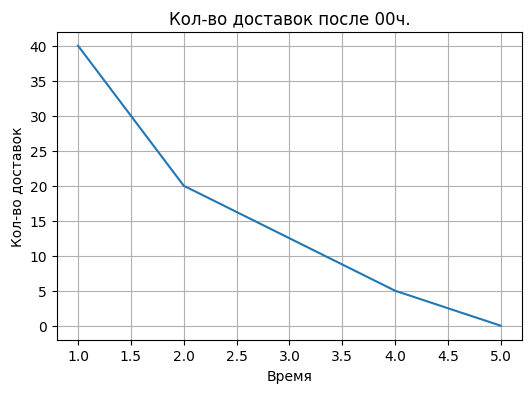

In [7]:
plt.figure(figsize=(6,4))
plt.plot ([5,4,2,1], [0,5,20,40])
plt.xlabel('Время')
plt.ylabel('Кол-во доставок')
plt.title('Кол-во доставок после 00ч.')
plt.grid();

#### Вывод:
В ночное время количество доставок снижается, таким образом, что к 5 часам утра количество падает до 0

In [9]:
df = pd.read_csv('kc_house_data1.csv', sep = ',')
df['price'].min(), df['price'].max(), df['price'].mean()

(75000.0, 7700000.0, 540088.1417665294)

#### 1.2. Вывод:
Стоимость квартир варьируется от 75 тыс. до 7,7 млн. Средняя стоимость около 540 тыс.

In [15]:
df['sqft_living'].mean()/df['floors'].mean()

1391.8806372207514

#### 1.3. Вывод:
В среднем на 1 этаж жилого дома приходится 1391.8 кв.м. жилой площади

In [16]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

#### 1.4. Вывод:
Наибольшее количество домов построено в 2014 году, наименьшее в 1934

In [17]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

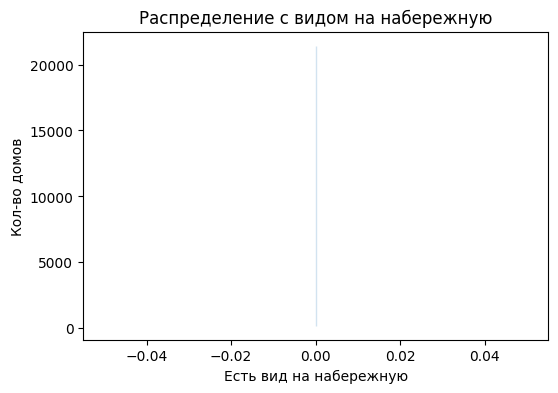

In [23]:
plt.figure(figsize=(6,4))
sns.lineplot (x=df['waterfront'], y=df['waterfront'].value_counts())
plt.xlabel('Есть вид на набережную')
plt.ylabel('Кол-во домов')
plt.title('Распределение с видом на набережную');

#### 2.1. Вывод:
Построение графика по эти данным не показывает необходимой информации, кроме этого само распределение от наличия вида на набережную дает лишь информацию, о том, что количество домов с таким видом очень мало. Соответственно либо на данной территории очень мало водоемов/рек и т.д., либо затраты на постройку домов у таких водоемов не покрываются последующей выручкой.

In [26]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [28]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

#### 2.2., 2.3. Вывод:
Больше всего одноэтажных домов, при этом среднее состояние дома - наиболее частая характеристика. Но домов с хорошим состоянием больше, чем домов с неудовлетворительным состоянием

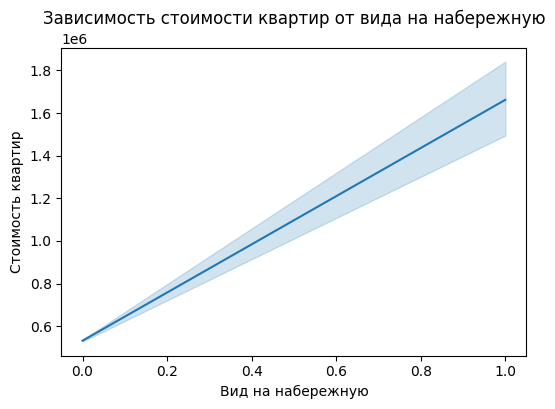

In [47]:
plt.figure(figsize=(6,4))
sns.lineplot (x=df['waterfront'], y=df['price'])
plt.xlabel('Вид на набережную')
plt.ylabel('Стоимость квартир')
plt.title('Зависимость стоимости квартир от вида на набережную');

#### Вывод:
Зависимость стоимости от вида на набережную - прямая

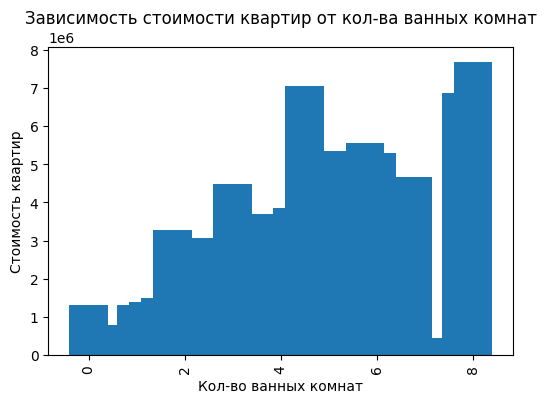

In [50]:
plt.figure(figsize=(6,4))
plt.bar(df['bathrooms'], df['price'])
plt.xlabel('Кол-во ванных комнат')
plt.ylabel('Стоимость квартир')
plt.title('Зависимость стоимости квартир от кол-ва ванных комнат')
plt.xticks(rotation = 90);

#### Вывод:
Наиболее высокая стоимость квартир с количеством ванных комнат более 4

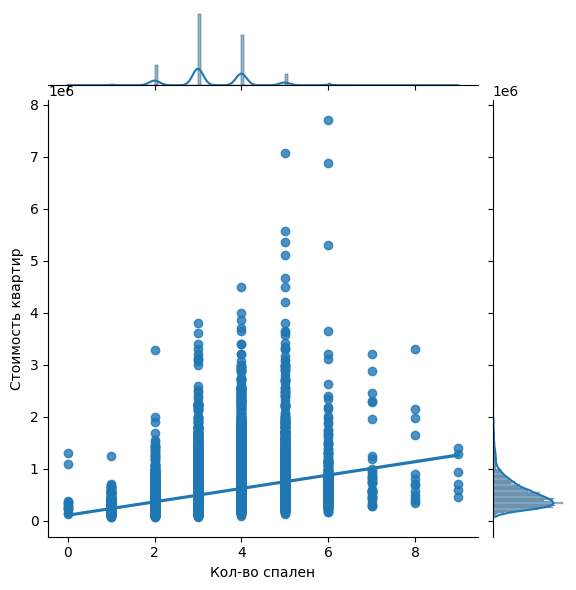

In [60]:
df_bed = df[df['bedrooms']<10]
sns.jointplot (x=df_bed['bedrooms'], y=df_bed['price'], kind='reg')
plt.xlabel('Кол-во спален')
plt.ylabel('Стоимость квартир');

#### Вывод:
Зависимость стоимости от кол-ва спален прямая, при этом больше всего квартир с 3-мя спальнями, позволяет сделать вывод о наиболее ликвидном количестве спален при строительстве домов в данном регионе.

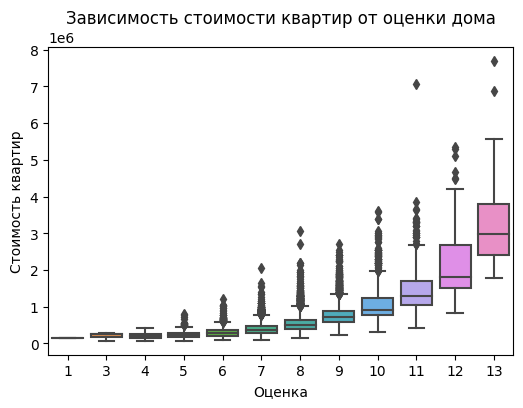

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot (x= df['grade'], y=df['price'])
plt.xlabel('Оценка')
plt.ylabel('Стоимость квартир')
plt.title('Зависимость стоимости квартир от оценки дома');

#### Вывод:
Зависимость стоимости от оценки также имеется, при этом большое количество выбросов

In [64]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix,1)
corr_matrix[np.abs(corr_matrix)<0.3] = 0
corr_matrix

D:\Temp\ipykernel_5276\754117230.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


#### Вывод:
Наибольшая коррекляция стоимости с 